<a href="https://colab.research.google.com/github/akridata-ai/DE-image-featurizer/blob/AKSW-11967-image-preprocessor/notebook/preprocessors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git Setup to run this notebook

In [ ]:
%cd #add location where you want to clone this repo 

In [1]:
!git clone https://github.com/akridata-ai/DE-image-featurizer.git

fatal: destination path 'DE-image-featurizer' already exists and is not an empty directory.


In [2]:
# get inside the repository
%cd DE-image-featurizer  

/Users/occipitalnet/work/DE-image-featurizer


In [17]:
# checkout to the branch -- will chainge this to default one
!git checkout develop

Switched to branch 'develop'
Your branch is up to date with 'origin/develop'.


In [4]:
#initialize git
!git init

Reinitialized existing Git repository in /Users/occipitalnet/work/DE-image-featurizer/.git/


# Imports and Basic Setup
Connect to a local runtime (or to a VM) and navigate to the notebook/ folder in the statsum repository.

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
#@title Imports {display-mode: "form"}
from PIL import Image
import os
from matplotlib.image import imread
import tensorflow as tf
from tqdm.notebook import tqdm
import sys
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display
import inspect
from skimage import data
import ipywidgets as widgets

In [7]:
path = os.path.abspath(os.path.join(os.getcwd(), 'DE-image-featurizer','preprocess'))
os.chdir(path)
from preprocessors import PreProcessors

# Utils


In [8]:
#@title Utils {display-mode: "form"}
def get_preprocessor_args():
    for preprocessor in [processor.name for processor in PreProcessors]:
        print(preprocessor, inspect.getfullargspec(getattr(PreProcessors,preprocessor).value.func))
        print("\n")
    
def preprocess_input(img_arr, preprocessor, **args):
    from PIL import Image
    prep = PreProcessors(getattr(PreProcessors, str(preprocessor)))
    
    arr = Image.fromarray(prep.fit_transform(img_arr, **args))
    plt.imshow(arr)

def getargs(low,high):
    return low,high
def getgamma(gamma):
    return gamma

# Demo

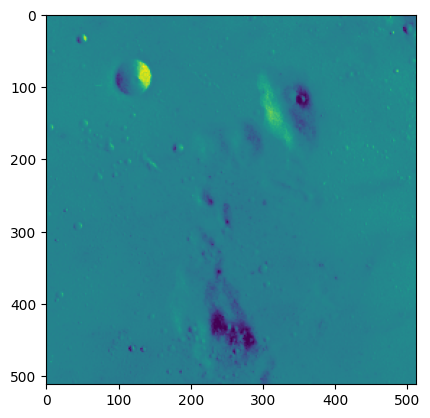

In [9]:
img_arr = data.moon()
plt.imshow(img_arr)

In [10]:
get_preprocessor_args()

GlobalThresholding FullArgSpec(args=['image', 'binary', 'invert'], varargs=None, varkw=None, defaults=(False, False), kwonlyargs=[], kwonlydefaults=None, annotations={})


LocalThresholding FullArgSpec(args=['image', 'block_size', 'offset', 'binary', 'invert'], varargs=None, varkw=None, defaults=(7, 0, False, False), kwonlyargs=[], kwonlydefaults=None, annotations={})


HysteresisThresholding FullArgSpec(args=['image', 'low', 'high'], varargs=None, varkw=None, defaults=(0.35, 0.5), kwonlyargs=[], kwonlydefaults=None, annotations={})


GammaCorrection FullArgSpec(args=['image', 'gamma'], varargs=None, varkw=None, defaults=(5,), kwonlyargs=[], kwonlydefaults=None, annotations={})


LogCorrection FullArgSpec(args=['image'], varargs=None, varkw=None, defaults=None, kwonlyargs=[], kwonlydefaults=None, annotations={})


HistogramEqualization FullArgSpec(args=['image'], varargs=None, varkw=None, defaults=None, kwonlyargs=[], kwonlydefaults=None, annotations={})


CLAHE FullArgSpec(args=['imag

## preprocessor with default values to the argument

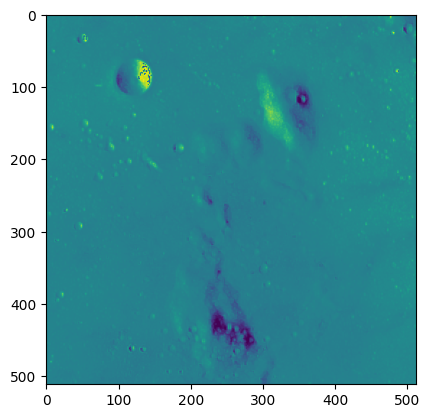

In [11]:
preprocess_input(img_arr, preprocessor = 'SobelEdgeHighlighting')

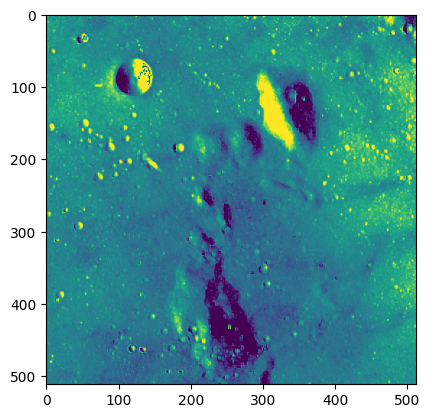

In [12]:
# default values
preprocess_input(img_arr, preprocessor = 'GammaCorrection')

## preprocessor with manually passed values

In [13]:
result = widgets.interactive(getgamma,gamma=(0.0,50.0))
display(result)

interactive(children=(FloatSlider(value=25.0, description='gamma', max=50.0), Output()), _dom_classes=('widget…

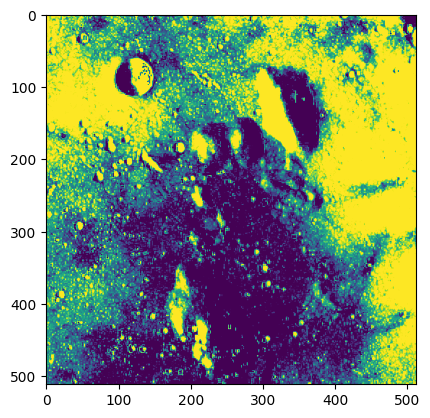

In [14]:
preprocess_input(img_arr, preprocessor = 'GammaCorrection', gamma = result.kwargs['gamma'])

In [15]:
result = widgets.interactive(getargs,low=(0.0,1.0), high = (0.0,1.0))
display(result)

interactive(children=(FloatSlider(value=0.5, description='low', max=1.0), FloatSlider(value=0.5, description='…

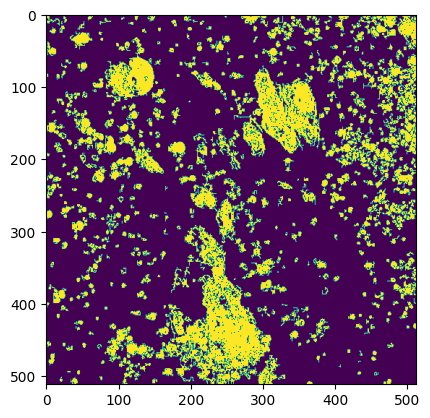

In [16]:
preprocess_input(img_arr,'HysteresisThresholding', low = result.kwargs['low'],high =  result.kwargs['high'])